# Words as Vectors

## Document-vectors to word-vectors

* We can use vectors to represent documents: a list of numbers representing word-counts or some other statistic like TF-IDF.  The number of dimensions is fixed and the meaning of each coordinate is clear.

* Now we are going to represent individual words as vectors of floating-point numbers in a high-dimensional space, with an arbitrary number of dimensions.  Why?

* If we want to use neural networks to process text, we need to find a way to feed them what they want as input: vectors of floating-point numbers between -1 or 0 and 1, not integers.

* It's easy to convert pixel-values in images to meaningful floating-point numbers, but words have no such natural ordering.

* How can we find such an encoding for words, where numbers that are close together represent things with similar meanings? 

## Representing Words as Numbers

* Words do not easily map onto a  real-valued continuum of numbers.

* We don’t want to confuse a NN model by mapping them onto that continuum in an arbitrary order, thus implying that this order of the words has meaning.

* As document vectors, individual token values are orthogonal, so naturally unordered and uncorrelated.

* We can start with an approach equivalent to document vectors, where each word occupies a different dimension. As if each word were a document of length 1. 

* This is “one-hot encoding” for text input: N-dimensional vectors, where N is the number of words in the corpus, with 1 for a given word and 0s elsewhere.  Not practical to use in an NN, where vector size is constrained (e.g. by our GPU), so we need to reduce the dimensionality.

## Word vectors embedded in a space of meaning

* Next, we could assign words randomly to vectors, but we would still be implying that tokens with similar numbers are somehow similar.

* We want to represent a word by a vector of floating-point numbers, within a vector space in which positions are correlated with meaning.

* Analogous to how we created a meaningful vector space for documents (as in TFIDF-style document analysis), but for words.

* We can visualize that space as having a structure in which words of similar meaning occupy similar parts of the space.

* Where does the structure of this space come from?  It is a by-product of training your model on some task. It’s a bit magical and unexpected.

## Simple, context-free methods

* The principle of most of these embeddings is fairly simple: word co-occurrence:  if two words frequently appear in close proximity over a vast corpus, they are probably related semantically.

* An neural network is trained on the corpus with the objective of producing vectors for each word such that words that frequently co-occur are located similarly in space (i.e. the cosine of the angle is close to 1).  

* If the vector assigned to a word cannot predict that word’s context accurately, the components of the vector are tweaked.

* The basic intuition is this: if two words tend to be surrounded by the same context words, then a neural network will be trained to output very similar vectors for those words.  

* Near-synonyms will tend to have similar words of context around them.

* This also handles stemming, as the singular and plural of a given word will normally have a similar context.

## Word2vec: some surprising, amazing results

Word2vec [webpage](https://code.google.com/archive/p/word2vec/): “It was recently shown that the word vectors capture many linguistic regularities, for example vector operations vector('Paris') - vector('France') + vector('Italy') results in a vector that is very close to vector('Rome'), and vector('king') - vector('man') + vector('woman') is close to vector('queen')”.
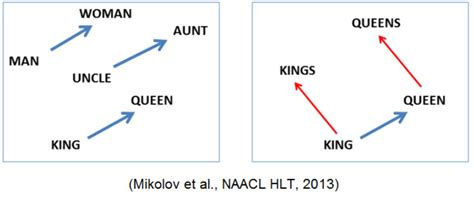

## Some surprising, unwelcome results

* This was very cool, as it was not really expected by the researchers.  

* Another thing that was not expected was the bias of these vectors.

* man : king :: woman : queen  -- OK

* Paris : France :: Tokyo : Japan -- OK

* father : doctor :: mother : nurse -- not OK

* man : programmer :: woman : homemaker -- not OK

* See [this paper](https://arxiv.org/abs/1607.06520). 

## Contextual embeddings

* A major weakness in models like word2vec is that they give an embedding for a word without regard to its context.  So the word “duck” has the same vector regardless of whether it means the animal or the verb. 

* Transformers fix this, but at the price of words no longer having a fixed vector regardless of context.

## Training an Embedding

* You can train the embeddings along with the weights for the NN.  In this model, you input text in one-hot encoding, and train the first hidden layer(s) to learn an embedding from the training process.

* You can use precomputed embeddings for your target language, as trained by someone else on a massive quantity of data. 

* Or you can have the best of both of these ideas via transfer learning.  You download a pre-trained large language model and fine-tune its weights on your own data.